In [32]:
# ensure scikit-learn is installed in this notebook environment
%pip install scikit-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [33]:
df = pd.read_csv('resume.csv')

In [34]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [35]:
df.sample(5)

,Category,Resume
388,Java Developer,Skills â¢ Language: Java â¢ Operating System...
228,Sales,IT Skills: MS Office. Photoshop. SQL Server.Ed...
529,Operations Manager,IT SKILLS â¢ Well versed with MS Office and I...
275,Health and fitness,Education Details \r\nJanuary 2009 P.G. Sports...
187,Mechanical Engineer,Education Details \r\nJanuary 2018 Bachelor's ...


In [36]:
df.shape

(962, 2)

In [37]:
df['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [38]:
df['Category'].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

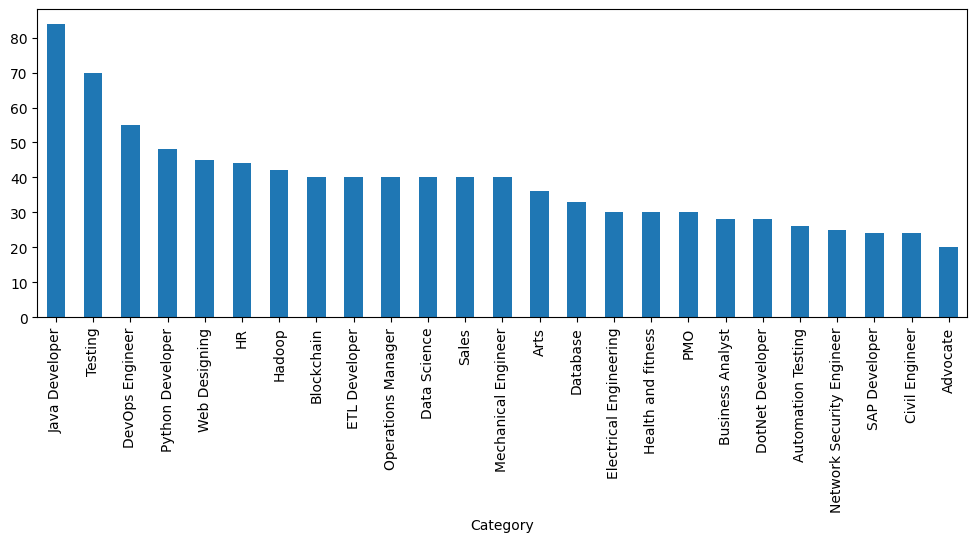

In [39]:
plt.figure(figsize=(12,4))
df['Category'].value_counts().plot(kind='bar')
plt.show()

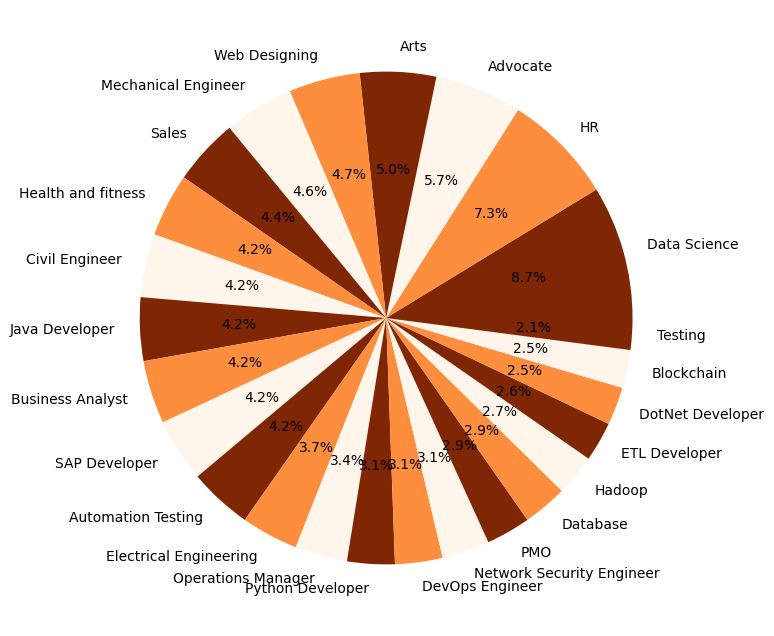

In [40]:
counts = df['Category'].value_counts()
labels = df['Category'].unique()
plt.figure(figsize=(8,8))
plt.pie(counts, labels=labels,autopct='%1.1f%%',colors=plt.cm.Oranges_r(np.linspace(0,1,3)))
plt.show()

In [41]:
df['Resume'][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

In [42]:
def clean(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    email_pattern = re.compile(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Za-z]{2,}\b')
    clean_text = url_pattern.sub('',text)
    clean_text = email_pattern.sub('',text)


    clean_text = re.sub('[^\w\s]','',clean_text)
    stop_words = set(stopwords.words('english'))
    clean_text = ' '.join(word for word in clean_text.split() if word.lower() not in stop_words)

    return clean_text



In [43]:
s = 'Hello, $%%& I found this  ## article at htttps://www.example.com. Please contact me at helpbuddy@gmail.com'

In [44]:
clean(s)

'Hello found article htttpswwwexamplecom Please contact'

In [45]:
df['Resume'] = df['Resume'].apply(lambda x:clean(x))
df['Resume'][7]

'Education Details BTech Rayat Bahra Institute Engineering Biotechnology Data Science Data Science Skill Details Numpy Exprience Less 1 year months Machine Learning Exprience Less 1 year months Tensorflow Exprience Less 1 year months Scikit Exprience Less 1 year months Python Exprience Less 1 year months GCP Exprience Less 1 year months Pandas Exprience Less 1 year months Neural Network Exprience Less 1 year monthsCompany Details company Wipro description Bhawana Aggarwal EMail Phone 09876971076 VVersatile highenergy professional targeting challenging assignments Machine PROFILE SUMMARY âª professional knowledge experience 2 years Wipro Technologies Machine Learning Deep Learning Data Science Python Software Development âª Skilled managing endtoend development software products projects inception requirement specs planning designing implementation configuration documentation âª Knowledge Python Machine Learning Deep Learning data Science Algorithms Neural Network NLP GCP âª Knowledge P

In [46]:
le = LabelEncoder()
le.fit(df[['Category']])
df['Category'] = le.transform(df['Category'])

c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [47]:
df['Category'].unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

In [48]:
tfidf = TfidfVectorizer()
tfidf.fit(df['Resume'])
resume = tfidf.transform(df['Resume'])

In [49]:
X_train,X_test,y_train,y_test = train_test_split(resume,df['Category'],test_size=0.2,random_state = 42)

In [50]:
X_train.shape

(769, 8042)

In [51]:
X_test.shape

(193, 8042)

In [52]:
y_train.shape

(769,)

In [53]:
y_test.shape

(193,)

In [54]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train ,y_train)
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test,y_pred)
print(f'Accuracy of knn Classifier: {accuracy*100:.2f}%')


Accuracy of knn Classifier: 98.45%


In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier

In [56]:
models = {
    'knn' :KNeighborsClassifier(),
    'LogisticRegression':LogisticRegression(),
    'RandomForestClassifier':RandomForestClassifier(),
    'SVC':SVC(),
    'MultinomialNB':MultinomialNB(),
    'OneVsRestClassifier':OneVsRestClassifier(MultinomialNB())
}

In [57]:
accuracy_scores = {}

for model_name,model in models.items():
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    accuracy_scores[model_name] = accuracy
    print(f'Accuracy of {model_name} on test data: {accuracy*100:.2f}%')

Accuracy of knn on test data: 98.45%
Accuracy of LogisticRegression on test data: 99.48%
Accuracy of RandomForestClassifier on test data: 98.96%
Accuracy of SVC on test data: 99.48%
Accuracy of MultinomialNB on test data: 97.93%
Accuracy of OneVsRestClassifier on test data: 99.48%


In [58]:
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [59]:
my_resume = df['Resume'][0]
my_resume

'Skills Programming Languages Python pandas numpy scipy scikitlearn matplotlib Sql Java JavaScriptJQuery Machine learning Regression SVM NaÃve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3js DCjs Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV understanding Deep learningEducation Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists accelerating review process run ana

In [64]:
cleaned_resume = clean(my_resume)
input_features = tfidf.transform([cleaned_resume])
prediction_id = model.predict(input_features)[0]
category_map = {
    'Java Developer':             84,
    'Testing':                    70,
    'DevOps Engineer':            55,
    'Python Developer':           48,
    'Web Designing':              45,
    'HR':                         44,
    'Hadoop':                     42,
    'Blockchain':                 40,
    'ETL Developer':              40,
    'Operations Manager':         40,
    'Data Science':               40,
    'Sales':                      40,
    'Mechanical Engineer':        40,
    'Arts':                       36,
    'Database':                   33,
    'Electrical Engineering':     30,
    'Health and fitness':         30,
    'PMO':                        30,
    'Business Analyst':           28,
    'DotNet Developer':           28,
    'Automation Testing':         26,
    'Network Security Engineer':  25,
    'SAP Developer':              24,
    'Civil Engineer':             24,
    'Advocate':                   20
}

category_name = {v: k for k, v in category_map.items()}.get(prediction_id,'Unknown Category')
print('Predicted Category is -> ',category_name)

Predicted Category is ->  Unknown Category


In [65]:
import pickle
pickle.dump(tfidf,open('tfidf.pkl', 'wb'))
pickle.dump(model,open('model .pkl','wb'))
